In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_16nov = df[df['timestamp'].dt.date == pd.to_datetime("2025-11-16").date()]

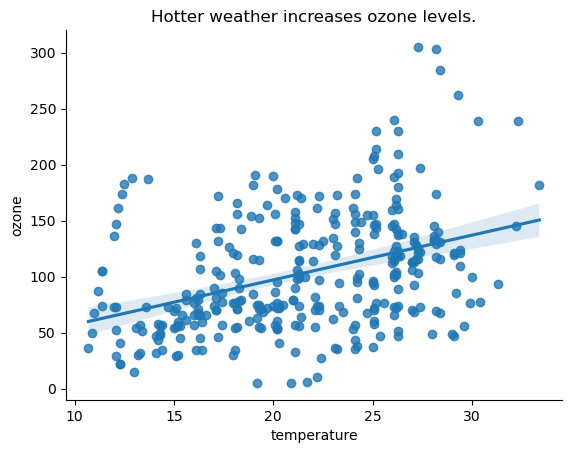

In [3]:
sns.regplot(data=df_16nov,x='temperature', y='ozone')
plt.title("Hotter weather increases ozone levels.")
sns.despine()
plt.show()

## Points to remember

    1.Line go up -- Positive relatioship (as temp increases, ozone increse)
    2.Line going down -- negative relationship (as temp increses, ozone decreases)
    3.Flat line -- No linear relationship (temp doesn't affect ozone much)

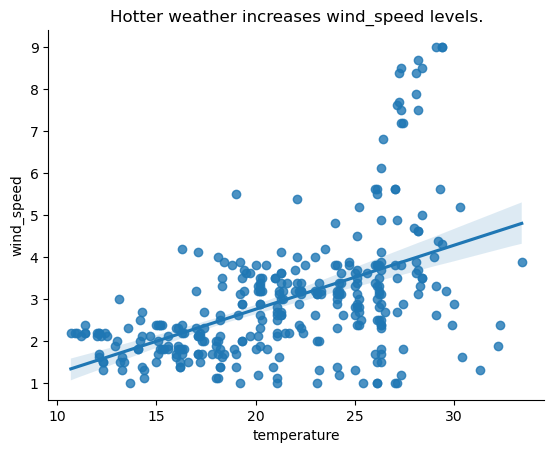

In [6]:
sns.regplot(data=df_16nov,x='temperature', y='wind_speed')
plt.title("Hotter weather increases wind_speed levels.")
sns.despine()
plt.show()

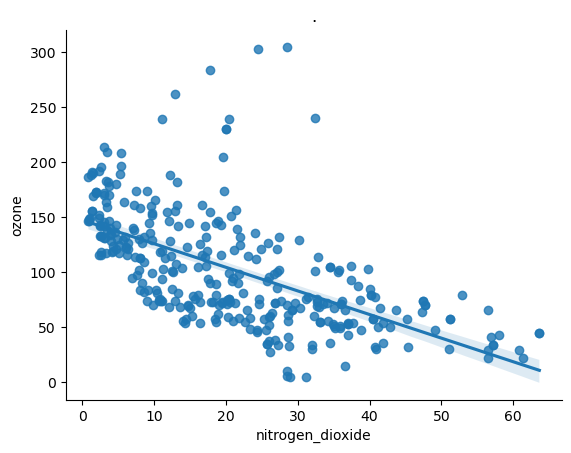

In [7]:
sns.regplot(data=df_16nov,x='nitrogen_dioxide', y='ozone')
plt.title(".")
sns.despine()
plt.show()

## Points to remember

    1.Line go up -- Positive relatioship 
    2.Line going down -- negative relationship
    3.Flat line -- No linear relationship